**Part II – Using the perceptron:**

Previous code :

In [36]:
import numpy as np
from sklearn.linear_model import Perceptron as SklearnPerceptron

class Perceptron:
    '''
    perceptron algorithm class
    __init__() initialize the model
    train() trains the model
    predict() predict the class for a new sample

    Attributes:
    - alpha: Learning rate for the perceptron, a positive float.
    - w: Weight vector for the features.
    - b: Bias term.
    '''

    def __init__(self, alpha):
        '''
        Initialize the Perceptron model.

        INPUT:
        - alpha: Learning rate, a float number bigger than 0.
        '''
        if alpha <= 0:
            raise Exception("Sorry, no numbers below or equal to zero. Start again!")

        self.alpha = alpha
        self.w = None  # Initialize weights to None; to be set during training
        self.b = 0     # Bias term initialized to 0

    def train(self, X, y, epochs=100):
        '''
        Train the perceptron on the provided dataset.

        INPUT:
        - X : is a 2D NxD numpy array containing the input features
        - y : is a 1D Nx1 numpy array containing the labels for the corrisponding row of X
        - epochs: Number of iterations over the dataset (default: 100).
        '''
        N, D = X.shape
        self.w = np.zeros(D)  # Initialize weights to zeros

        for epoch in range(epochs):
            for i in range(N):
                # Compute prediction: sign(w^T x + b)
                y_pred = np.sign(np.dot(self.w, X[i]) + self.b)

                # Update weights and bias if prediction is incorrect
                if y_pred != y[i]:

                    self.w += self.alpha * y[i] * X[i]  # Update weights
                    self.b += self.alpha * y[i]         # Update bias

    def predict(self, X_new):
        '''
        Predict the labels for new samples.

        INPUT :
        - X_new : is a MxD numpy array containing the features of new samples whose label has to be predicted
        A

        OUTPUT :
        - y_hat : is a Mx1 numpy array containing the predicted labels for the X_new samples
        '''
        y_hat = np.sign(np.dot(X_new, self.w) + self.b)  # Compute sign(w^T x + b)
        return y_hat

Load the dataset and using the load_digits function in scikit-learn. Check its documentation
to see how you can use it. The dataset contains digits from 0 to 9.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
digits = load_digits()
X, y = digits.data, digits.target

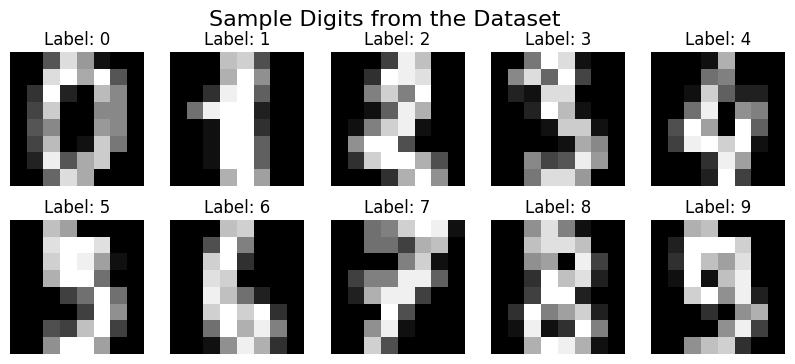

In [3]:
# Visualize the dataset
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(digits.images[i], cmap='gray')
    plt.title(f"Label: {digits.target[i]}")
    plt.axis('off')
plt.suptitle("Sample Digits from the Dataset", fontsize=16)
plt.show()

You need to implement an algorithm to classify the MNIST digits using a perceptron (no
multi-layer perceptron). Consider splitting your data into training, validation and test. You can
use the train_test_split function from scikit-learn.

In [38]:
# Split the dataset into training, validation, and testing sets
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25)  # 60% train, 20% val, 20% test

Train your perceptron using the training set. Use the validation set to choose a model. Report
the selected model’s accuracy using the testing set. Report your results.
Hint: The digits dataset is a dataset of images. You need to convert them from a 2D array to a 1D
one.

In [40]:
# One-vs-All Perceptron Classifier
class MultiClassPerceptron:
    def __init__(self, alpha, num_classes):
        self.alpha = alpha
        self.num_classes = num_classes
        self.perceptrons = [Perceptron(alpha) for _ in range(num_classes)]

    def train(self, X, y, epochs=100):
        for class_idx in range(self.num_classes):
            y_binary = np.where(y == class_idx, 1, -1)  # Convert labels to binary for the current class
            self.perceptrons[class_idx].train(X, y_binary, epochs)

    def predict(self, X):
        scores = np.array([p.predict(X) for p in self.perceptrons]).T  # Shape: (num_samples, num_classes)
        return np.argmax(scores, axis=1)

# Test with different learning rates and epochs to find the best one
learning_rates = [0.001, 0.01, 0.1]
epochs_list = [10, 50, 100]
num_classes = 10
best_lr = None
best_epochs = None
best_accuracy = 0

# Loop through all combinations of learning rates and epochs
for lr in learning_rates:
    for epochs in epochs_list:
        print(f"\nTesting learning rate: {lr} with epochs: {epochs}")
        multi_class_perceptron = MultiClassPerceptron(alpha=lr, num_classes=num_classes)
        multi_class_perceptron.train(X_train, y_train, epochs=epochs)

        # Evaluate on validation set
        y_val_pred = multi_class_perceptron.predict(X_val)
        val_accuracy = accuracy_score(y_val, y_val_pred)
        print(f"Validation Accuracy: {val_accuracy:.2f}")

        # Update the best model configuration
        if val_accuracy > best_accuracy:
            best_accuracy = val_accuracy
            best_lr = lr
            best_epochs = epochs

# Train with the best configuration on the test set
print(f"\nBest configuration: Learning rate = {best_lr}, Epochs = {best_epochs} with Validation Accuracy: {best_accuracy:.2f}")
multi_class_perceptron = MultiClassPerceptron(alpha=best_lr, num_classes=num_classes)
multi_class_perceptron.train(X_train, y_train, epochs=best_epochs)

# Evaluate on test set
y_test_pred = multi_class_perceptron.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy with best learning rate and epochs: {test_accuracy:.2f}")

# Print true and predicted digits for each test sample
print("\nTrue and Predicted digits for test samples:")
for i, (true, pred) in enumerate(zip(y_test[:20], y_test_pred[:20])):
    print(f"Test sample {i + 1}: True digit: {true}, Predicted digit: {pred}")

# Detailed classification report
print("\nClassification Report on Test Set:")
print(classification_report(y_test, y_test_pred))



Testing learning rate: 0.001 with epochs: 10
Validation Accuracy: 0.87

Testing learning rate: 0.001 with epochs: 50
Validation Accuracy: 0.90

Testing learning rate: 0.001 with epochs: 100
Validation Accuracy: 0.90

Testing learning rate: 0.01 with epochs: 10
Validation Accuracy: 0.87

Testing learning rate: 0.01 with epochs: 50
Validation Accuracy: 0.90

Testing learning rate: 0.01 with epochs: 100
Validation Accuracy: 0.89

Testing learning rate: 0.1 with epochs: 10
Validation Accuracy: 0.88

Testing learning rate: 0.1 with epochs: 50
Validation Accuracy: 0.90

Testing learning rate: 0.1 with epochs: 100
Validation Accuracy: 0.90

Best configuration: Learning rate = 0.01, Epochs = 50 with Validation Accuracy: 0.90
Test Accuracy with best learning rate and epochs: 0.93

True and Predicted digits for test samples:
Test sample 1: True digit: 1, Predicted digit: 1
Test sample 2: True digit: 7, Predicted digit: 7
Test sample 3: True digit: 4, Predicted digit: 4
Test sample 4: True digit